# **Human Resources Data Science Project**
*(This project is based off of the [IBM HR Analytics Competition](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset))*  
  
Author: Malik R. Booker  
Created: 19-MAY-2020  
Edited: 22-MAY-2020

## **Quick Navigation**
- [Introduction](#Introduction)
- [Hypotheses](#Hypotheses)
- [Data Analysis](#Data-Analysis)
    - [Feature Distribution](#Feature-Distribution)
    - [Attrition by Age](#Attrition-by-Age)
    - [Kernel Density Estimation](#Kernel-Density-Estimation)
- [Preprocessing](#Preprocessing)
- [Modeling](#Modeling)
    - [Linear Model (Gradient Boosted Classifier)](#Linear-Model)
    - [Neural Network](#Neural-Network)
    - [Results](#Results)
- [Actionble Insight](#Actionable-Insight)

## Introduction

The Human Resources Department is responsible for a large portion of a  
company's internal operations.  
These operations include:
- Hiring and Recruiting
- Training and Development
- Employee Compensation
- Employee Benefits
- Employee Relations
- Legal Responsibilities

Hiring employees is an expensive task. The final cost of hiring a new  
employee is the sum of training, briefing, recruiting, and of course  
lost profit from not having an open spot on a team filled.  

Retention, on the other hand, is much less expensive with respect to  
the hiring process. We can circumvent the affect that the hiring process  
would cost a company by simply making it more desirable to stay with the  
company longer.

## Hypotheses 
1. Employee attrition increases as distance from home increases.  
2. Employee attrition is strongly correlated with Department/Job Title.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import gc

In [2]:
url = 'https://raw.githubusercontent.com/malikrb/HumanResourcesDemonstration/master/data/hr_data.csv'
df = pd.read_csv(url)

In [3]:
with pd.option_context('display.max_columns', 35):
    display(df.head(6))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6


In [4]:
# Bin the Data into ['Close', 'Middle', 'Far']
temp = df.copy()
temp['DistanceFromHome'] = pd.cut(temp['DistanceFromHome'], 3, labels=['Closest', 'Middle', 'Farthest'])

temp = pd.concat([temp, pd.get_dummies(temp['Attrition'], prefix='Attrition')], axis=1)

# Visualize Attrition
display(temp.groupby(['DistanceFromHome'])[['Attrition_No', 'Attrition_Yes']].sum())

,Attrition_No,Attrition_Yes
DistanceFromHome,,
Closest,882.0,144.0
Middle,171.0,44.0
Farthest,180.0,49.0


This frame shows that the *raw attrition count* was higher for  
those who live the closest to the company, but suprisingly the  
*Middle* group had the highest attrition rate at *44:215*.

Hypothesis 1 seems to be debunk by this observation but we won't  
completely accept this until further investigation is conducted.

In [5]:
display(temp.groupby(['Department'])[['Attrition_No', 'Attrition_Yes']].sum())
print('--------------------------------------------')
display(temp.groupby(['JobRole'])[['Attrition_No', 'Attrition_Yes']].sum())
print('-------------------------------------------------------------------')
display(temp.groupby(['Department', 'JobRole'])[['Attrition_No', 'Attrition_Yes']].sum())

del temp
gc.collect();

,Attrition_No,Attrition_Yes
Department,,
Human Resources,51.0,12.0
Research & Development,828.0,133.0
Sales,354.0,92.0


--------------------------------------------


,Attrition_No,Attrition_Yes
JobRole,,
Healthcare Representative,122.0,9.0
Human Resources,40.0,12.0
Laboratory Technician,197.0,62.0
Manager,97.0,5.0
Manufacturing Director,135.0,10.0
Research Director,78.0,2.0
Research Scientist,245.0,47.0
Sales Executive,269.0,57.0
Sales Representative,50.0,33.0


-------------------------------------------------------------------


Attrition_No  Attrition_Yes
Department             JobRole                                               
Human Resources        Human Resources                    40.0           12.0
                       Manager                            11.0            0.0
Research & Development Healthcare Representative         122.0            9.0
                       Laboratory Technician             197.0           62.0
                       Manager                            51.0            3.0
                       Manufacturing Director            135.0           10.0
                       Research Director                  78.0            2.0
                       Research Scientist                245.0           47.0
Sales                  Manager                            35.0            2.0
                       Sales Executive                   269.0           57.0
                       Sales Representative               50.0           33.0

The highest and lowest raw attrition counts were for the positions  
Laboratory Technition and (Human Resources) Manager at *62* and *0,*  
respectively.  

The highest and lowest rate of attrition were for the positions  
Sales Representative and (Human Resources) Manager at *50:33* and  
*11:0*, respectively.

Sales Representatives hold a significantly large *50:33* No/Yes  
attrition ratio while the next closest ratio belongs to Sales  
Executives at *269:57*

The data above somewhat supports the claim that Hypothesis 2  
states that attrition is correlated, however, more analysis is  
needed to determine if the two are strongly correlated.

In [6]:
from sklearn.preprocessing import LabelEncoder

df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])
df = df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

with pd.option_context('display.max_columns', 35):
    display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


## Data Analysis

#### Feature Distribution

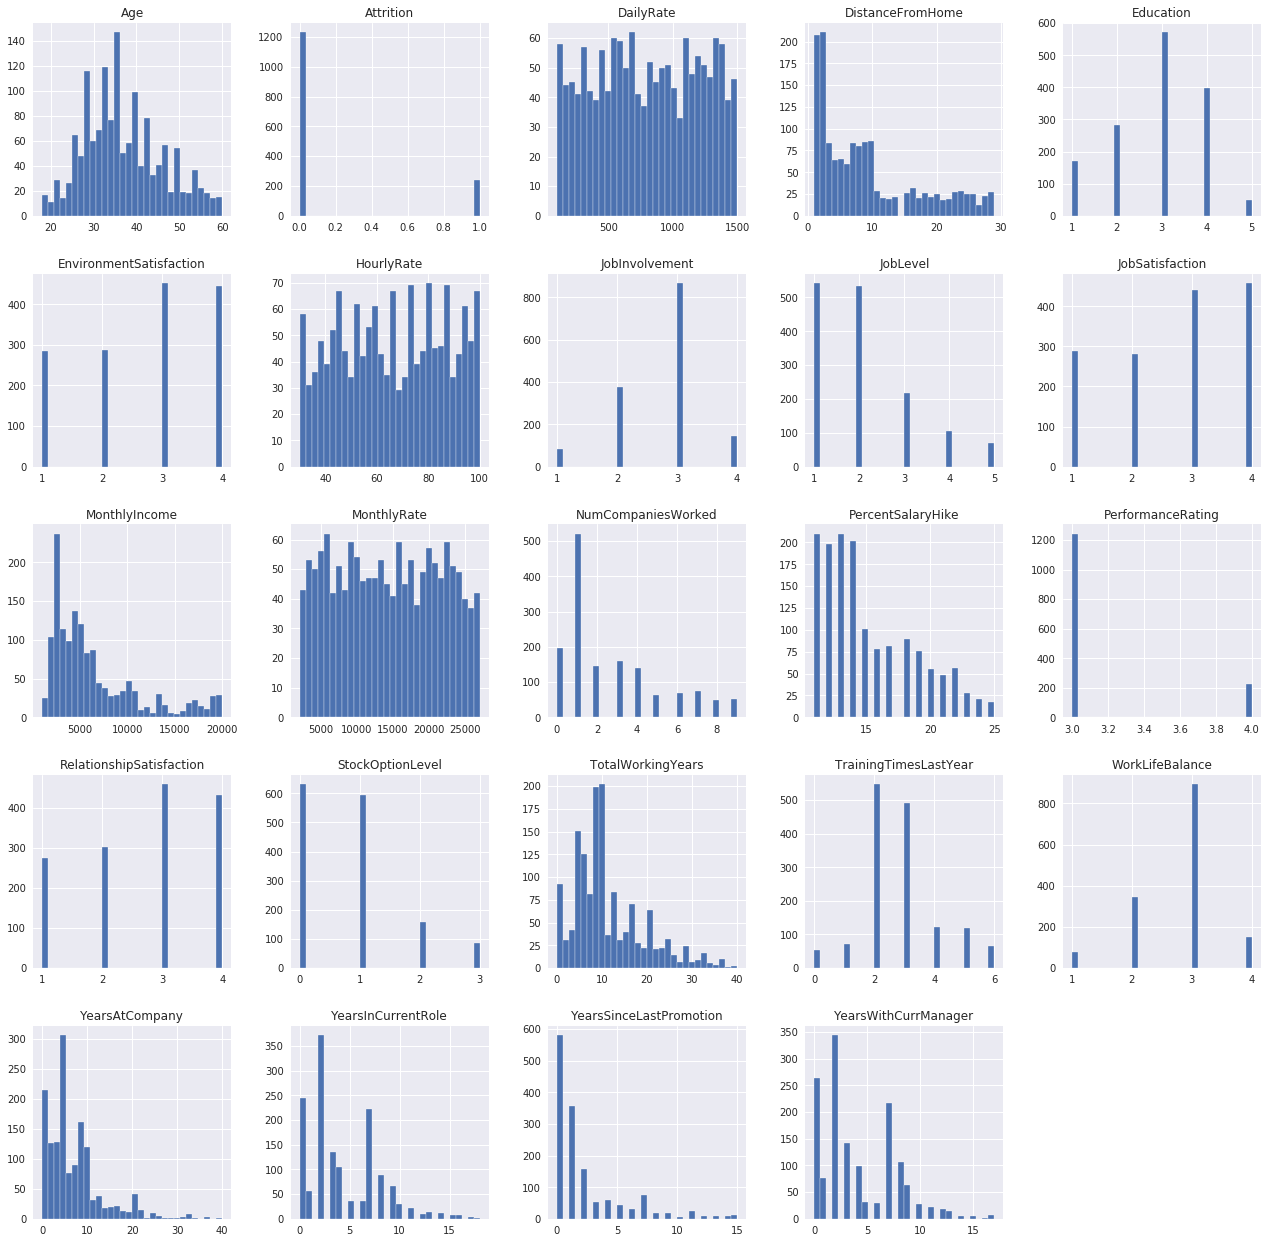

In [7]:
plt.style.use('seaborn')

df.hist(bins=30, figsize=(22,22), edgecolor='w')

plt.show()

From the graphs above, we can see that the distributions of  
numerous features are positively skewed. In this context, the graphs  
suggest that employees tend to spent quite a large amount of years  
with the company, however, the majority of categories seem to have  
a diminishing pattern as they approach their respective maximum.

#### Attrition by Age

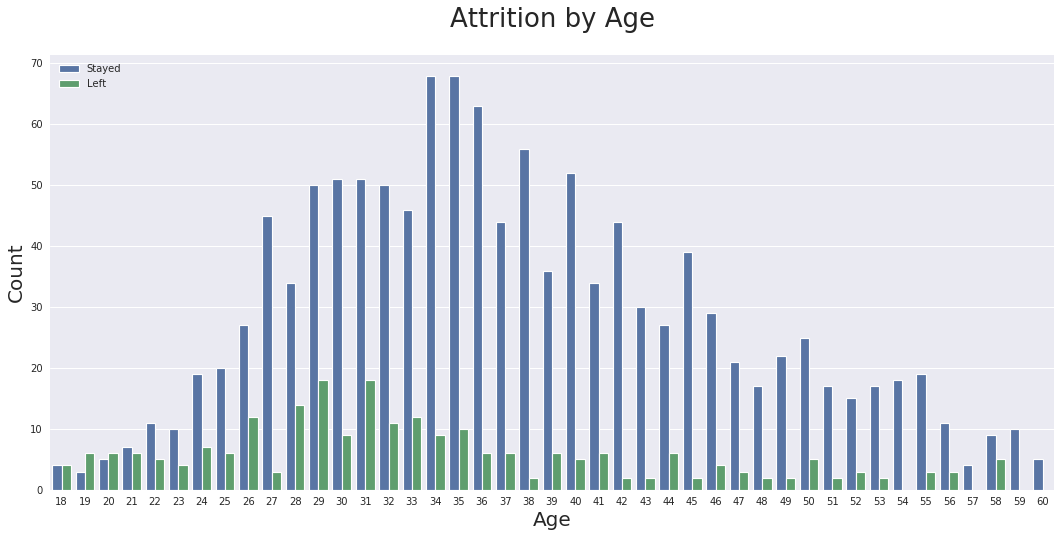

In [8]:
f, ax = plt.subplots(1, 1, figsize=(18,8))
sns.countplot(x='Age', hue='Attrition', data=df,
              edgecolor='w', linewidth=1.15)
plt.title('Attrition by Age', size=26, y=1.05)
plt.xlabel('Age', size=20)
plt.ylabel('Count', size=20)

plt.legend(['Stayed', 'Left'])

plt.show()

The countplot seems to suggest that the ages with the highest  
*raw attrition count* are those within the range of *26-35*.

The highest *rate of attrition* however seems to be those within  
the age range of *18-21*.

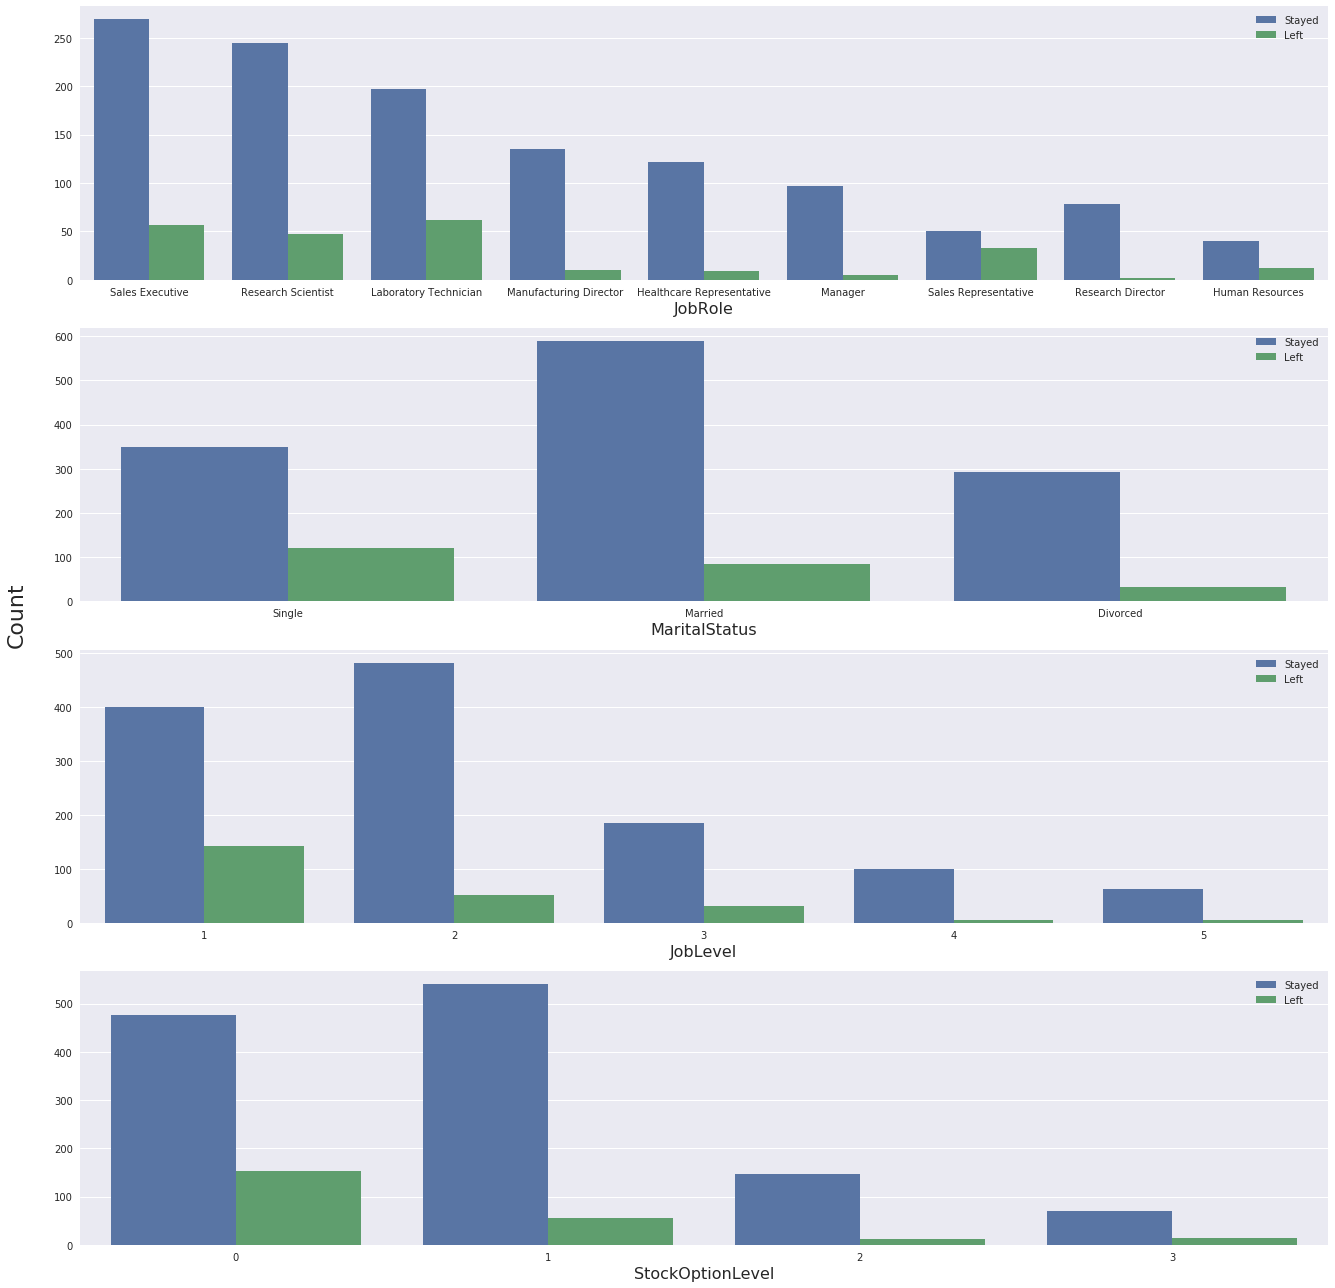

In [9]:
f, axes = plt.subplots(4, 1, figsize=(18,18), tight_layout=True)

x_vars = ['JobRole', 'MaritalStatus', 'JobLevel', 'StockOptionLevel']
for ax, x in zip(axes, x_vars):
    sns.countplot(x=x, hue='Attrition', data=df, ax=ax)
    ax.set_xlabel(x, size=16)
    ax.set_ylabel("")
    ax.legend(['Stayed', 'Left'])

f.text(x=-0.0275, y=0.5, s='Count', rotation=90, size=22)

plt.show()

del x_vars
gc.collect();

Once again, we have visualized the relationship of job title/role and attrition  
and Sales Representative again appears to have the highest attrition ratio.

The numeric Values like: Job Involvement and Job Level actually seem to have a linear  
relationship with the attrition rate. Of course, further investigation will be done in  
the modeling step to see if this hypothesis is supported.

As far as we are concerned from a obervational standpoint, we will take the claim from  
hypothesis 2 and formulate a controlled study to further investigate the correlation  
between job title/role and attrition.

#### Kernel Density Estimation

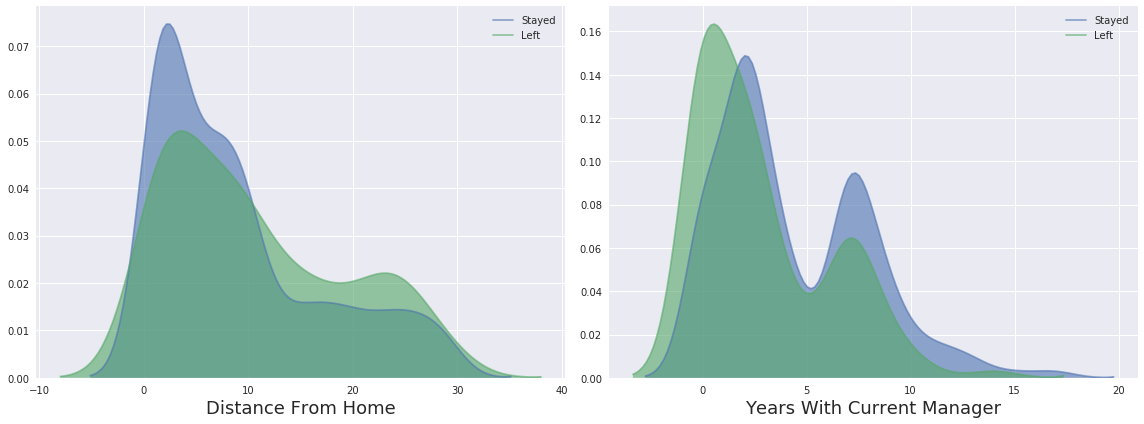

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6), tight_layout=True)

# Split the DataFrame by Attrition
attrition_0 = df.loc[df['Attrition'] == 0]
attrition_1 = df.loc[df['Attrition'] == 1]

sns.kdeplot(attrition_0['DistanceFromHome'], label='Stayed',
            shade=True, ax=ax1, alpha=0.6)
sns.kdeplot(attrition_1['DistanceFromHome'], label='Left',
            shade=True, ax=ax1, alpha=0.6)
ax1.set_xlabel('Distance From Home', size=18)

sns.kdeplot(attrition_0['YearsWithCurrManager'], label='Stayed',
            shade=True, ax=ax2, alpha=0.6)
sns.kdeplot(attrition_1['YearsWithCurrManager'], label='Left',
            shade=True, ax=ax2, alpha=0.6)
ax2.set_xlabel('Years With Current Manager', size=18)

plt.show()

del attrition_0, attrition_1
gc.collect();

With Reference to the groupby frames earlier, this plot further supports the sentiment  
that the majority of the attrition comes from those who live in the shortest of distances  
from the company.

It's safe to say that hypothesis 1 is no longer worth pursuing with futher resources.

## Preprocessing

In [11]:
# Encode all 'object' columns
columns = df.select_dtypes(include='object').columns
for col in columns:
    df[col] = LabelEncoder().fit_transform(df[col])
    
df = pd.get_dummies(df)
    
del columns
gc.collect();

In [12]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


## Modeling

In [13]:
# Splitting the DataFrame into train test
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from multiprocessing import cpu_count

def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='accuracy',
                       do_probabilities=False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv,  
        scoring=scoring_fit,
        verbose=2,
        n_jobs=cpu_count()//2,
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    score = accuracy_score(pred, y_test)
    
    return fitted_model, pred, score

#### Linear Model

In [15]:
from xgboost import XGBClassifier

param_grid = {
    'colsample_bytree': [0.7],
    'learning_rate': [0.01],
    'max_depth': [5],
    'n_estimators': [500],
    'reg_alpha': [1.1],
    'reg_lambda': [1.2],
    'subsample': [0.8],
#     'colsample_bytree': [0.7, 0.8],
#     'learning_rate': [0.01, 0.05],
#     'n_estimators': [500, 1000],
#     'max_depth': [5, 10],
#     'reg_alpha': [1.1, 1.2, 1.3],
#     'reg_lambda': [1.1, 1.2, 1.3],
#     'subsample': [0.7, 0.8, 0.9]
}

model = XGBClassifier()

xgb_model, xgb_pred, xgb_score = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                        param_grid, cv=5, scoring_fit='accuracy')

print(xgb_model.best_score_)
print(xgb_model.best_params_)
print(f'xgb_score: {xgb_score}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    2.8s finished


0.8648106743598991
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'reg_alpha': 1.1, 'reg_lambda': 1.2, 'subsample': 0.8}
xgb_score: 0.8809523809523809


#### Neural Network

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_model(activation='relu', optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(500, activation=activation, input_shape=(30, )))
    model.add(Dense(500, activation=activation))
    model.add(Dense(500, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    
    return model

In [17]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

param_grid = {
    'batch_size':   [50],
    'epochs':       [125],
    # 'dropout_rate': [0.2, 0.3],
    # 'activation':   ['relu', 'elu'],
    # 'batch_size':   [50, 100, 150],
    # 'optimizer':    ['Adam', 'Nadam'],
    # 'epochs':       [25, 75, 125],
}

model = KerasClassifier(build_fn=build_model, verbose=0)

nn_model, nn_pred, nn_score = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                        param_grid, cv=5, scoring_fit='accuracy')

print(nn_model.best_score_)
print(nn_model.best_params_)
print(f'nn_score: {nn_score}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/home/mamba/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   45.7s finished


0.8307681211684097
{'batch_size': 50, 'epochs': 125}
nn_score: 0.8673469387755102


## Results

The xgb_boost model performed slightly better than the neural network  
model, so we will use this one to estimate the feature importances.

In [18]:
features = xgb_model.best_estimator_.feature_importances_
columns = X.columns
sorted_features = sorted(zip(columns, features), key=lambda x: x[1], reverse=True)

## Uncomment lines below to see feature importances
## with respective column
# for col, feature in sorted_features:
#     print(f'{col}: {feature}')

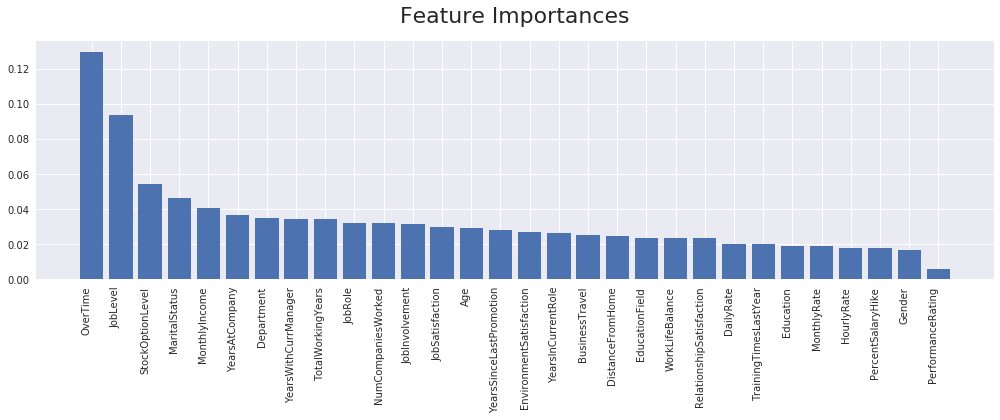

In [19]:
plt.subplots(1, 1, figsize=(14,6), tight_layout=True)

x = [x[0] for x in sorted_features]
height = [x[1] for x in sorted_features]

plt.bar(x=x, height=height)
plt.title('Feature Importances', size=22, y=1.05)
plt.xticks(rotation=90, ha='right')
plt.show()

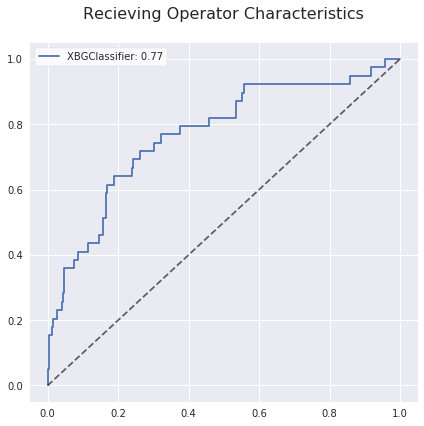

In [45]:
from sklearn.metrics import roc_curve, auc

xgb_prob = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(y_test, xgb_prob)
roc_auc = auc(fpr, tpr)

plt.subplots(1, 1, figsize=(6,6), tight_layout=True)

plt.title(f'Recieving Operator Characteristics', size=16, y=1.05)
plt.plot(fpr, tpr, label=f'XBGClassifier: {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--', alpha=0.6)

plt.legend(frameon=1, facecolor='w')

plt.show()

Not the greatest ROC curve, but that can be more finely tuned as   
more data comes in.

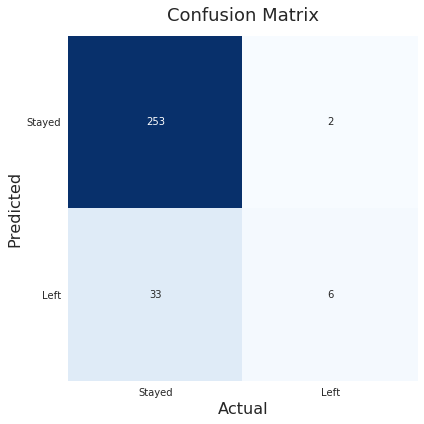

In [40]:
from sklearn.metrics import confusion_matrix

mxN = confusion_matrix(y_test, xgb_pred)
plt.subplots(1, 1, figsize=(6,6), tight_layout=True)

plt.title('Confusion Matrix', size=18, y=1.025)
sns.heatmap(mxN, annot=True, fmt='d',
            cmap='Blues', cbar=False,
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left']
           )

plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.yticks(rotation=0)

plt.show()

The confusion matrix seems to suggest that our XGB model has taken an aggressive stance on  
predicting that employees have left, even if they haven't.

## **Actionable Insight**

The data shown suggests that a company should focus on at the following 3 key  
factors when planning to maximize employee retention while minimizing adverse  
affection on other factors of influence.

**Over time**  
Those with higher overtime hours logged tended to be be much more likely to quit  
or be fired than those with less overtime hours. [Occupational burnout](https://en.wikipedia.org/wiki/Occupational_burnout) is a legitimate  
concern that should be addressed when considering employee retention.

Possible  
steps to consider include *improved distribution of responsibility* and encouragement  
to not work to such an extent that an employee may evetually suffer from  [occupational burnout.](https://en.wikipedia.org/wiki/Occupational_burnout)  

**Job Level**  
In an almost linear fashion, those with a lower job level saw an increased rate  
of attrition.

The employer should aim to focus on promoting job advancement opportunities when  
possible to get employees out of that stage OR they should improve the quality of  
life for the employees who are in that stage.

**Stock Options Level**  
Those with a 0 Level stock option had not only the highest raw attrition count  
at nearly 150,  but also held the highest attrition ratio with respect to the  
other stock options levels. 

An employee's stock options satisfaction should be considered as another  
possible metric to further investigate as a factor retention influence.